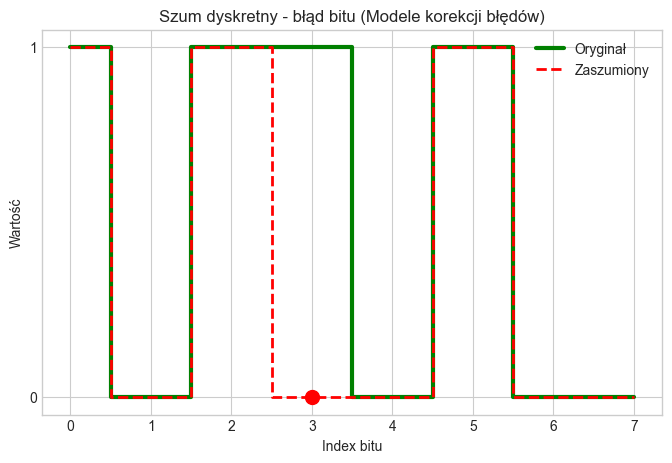

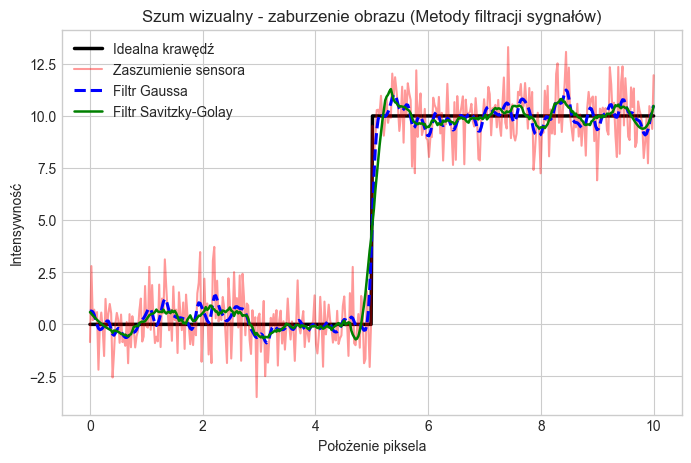

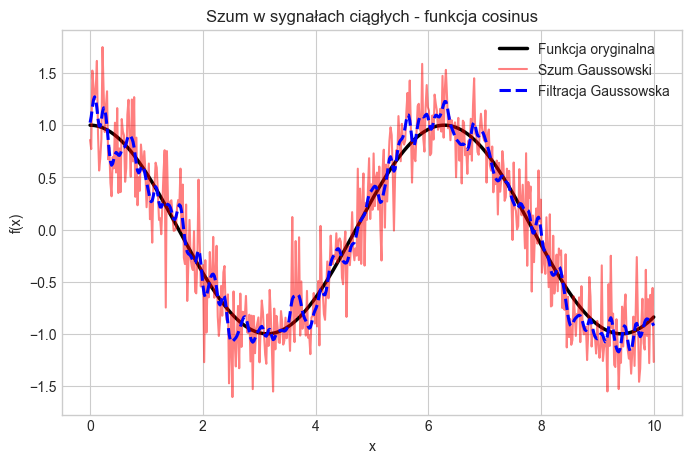

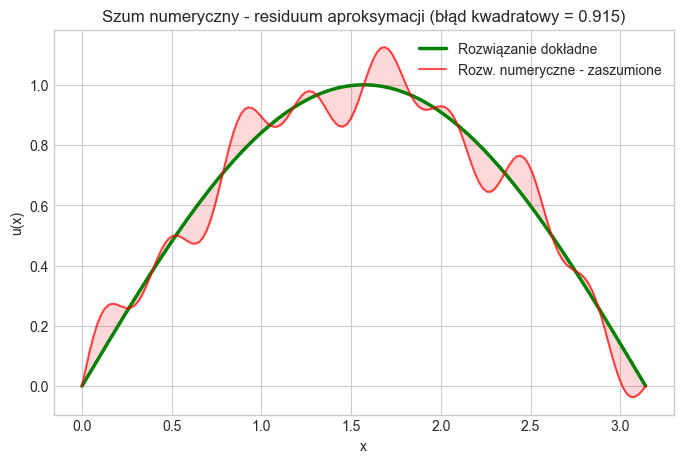

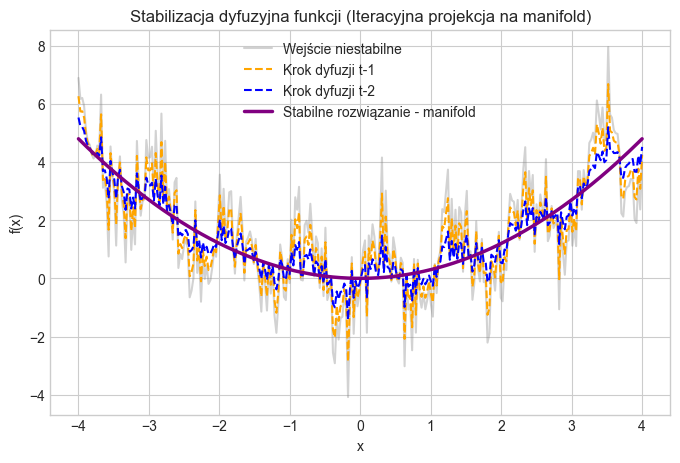

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter

plt.style.use('seaborn-v0_8-whitegrid')

# =====================================================================
# 1. PARADYGMAT DYSKRETNY - KODY KOREKCYJNE
# =====================================================================
bits_orig = np.array([1, 0, 1, 1, 0, 1, 0, 0])
bits_noise = bits_orig.copy()
bits_noise[3] ^= 1  # wprowadzamy błąd

x = np.arange(len(bits_orig))
plt.figure(figsize=(8, 5))
plt.step(x, bits_orig, where='mid', linewidth=3, label="Oryginał", color='green')
plt.step(x, bits_noise, where='mid', linewidth=2, linestyle='--', label="Zaszumiony", color='red')
plt.plot(3, bits_noise[3], 'ro', markersize=10)
plt.title("Szum dyskretny - błąd bitu (Modele korekcji błędów)")
plt.xlabel("Index bitu")
plt.ylabel("Wartość")
plt.yticks([0, 1])
plt.legend()
plt.show()

# =====================================================================
# 2. PARADYGMAT WIZUALNY - SZUM GAUSSOWSKI
# =====================================================================
x = np.linspace(0, 10, 400)
signal = np.where(x < 5, 0, 10)
noise = np.random.normal(0, 1.2, size=len(x))
noisy = signal + noise

filtered = gaussian_filter(noisy, sigma=2)
smooth_savgol = savgol_filter(noisy, window_length=31, polyorder=3)

plt.figure(figsize=(8, 5))
plt.plot(x, signal, 'k-', linewidth=2.5, label="Idealna krawędź")
plt.plot(x, noisy, 'r-', alpha=0.4, label="Zaszumienie sensora")
plt.plot(x, filtered, 'b--', linewidth=2.2, label="Filtr Gaussa")
plt.plot(x, smooth_savgol, 'g-', linewidth=1.8, label="Filtr Savitzky-Golay")
plt.title("Szum wizualny - zaburzenie obrazu (Metody filtracji sygnałów)")
plt.xlabel("Położenie piksela")
plt.ylabel("Intensywność")
plt.legend()
plt.show()

# =====================================================================
# 2a. PARADYGMAT SYGNAŁÓW CIĄGŁYCH 
# =====================================================================
x_cont = np.linspace(0, 10, 500)
signal_cont = np.cos(x_cont)
noise_cont = np.random.normal(0, 0.3, size=len(x_cont))
noisy_cont = signal_cont + noise_cont
filtered_cont = gaussian_filter(noisy_cont, sigma=2)

plt.figure(figsize=(8, 5))
plt.plot(x_cont, signal_cont, 'k-', linewidth=2.5, label="Funkcja oryginalna")
plt.plot(x_cont, noisy_cont, 'r-', alpha=0.5, label="Szum Gaussowski")
plt.plot(x_cont, filtered_cont, 'b--', linewidth=2.2, label="Filtracja Gaussowska")
plt.title("Szum w sygnałach ciągłych - funkcja cosinus")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

# =====================================================================
# 3. PARADYGMAT ANALITYCZNY - RESIDUUM RÓWNAŃ RÓŻNICZKOWYCH
# =====================================================================
x_fem = np.linspace(0, np.pi, 150)
y_true = np.sin(x_fem)
noise_func = 0.15 * np.cos(4 * x_fem) * np.sin(12 * x_fem)
y_num = y_true + noise_func
error_L2 = np.linalg.norm(y_true - y_num)

plt.figure(figsize=(8, 5))
plt.plot(x_fem, y_true, 'g-', linewidth=2.5, label="Rozwiązanie dokładne")
plt.plot(x_fem, y_num, 'r-', alpha=0.7, label="Rozw. numeryczne - zaszumione")
plt.fill_between(x_fem, y_true, y_num, color='red', alpha=0.15)
plt.title(f"Szum numeryczny - residuum aproksymacji (błąd kwadratowy = {error_L2:.3f})")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.show()

# =====================================================================
# 4. PARADYGMAT DYFUZYJNY - STABILIZACJA FUNKCJI
# =====================================================================
x = np.linspace(-4, 4, 300)
manifold = 0.3 * x**2
unstable = manifold + 1.5 * np.sin(6 * x) + np.random.randn(len(x))
diff1 = unstable*0.7 + manifold*0.3
diff2 = diff1*0.5 + manifold*0.5

plt.figure(figsize=(8, 5))
plt.plot(x, unstable, color='gray', alpha=0.35, label="Wejście niestabilne")
plt.plot(x, diff1, color='orange', linestyle='--', label="Krok dyfuzji t-1")
plt.plot(x, diff2, color='blue', linestyle='--', label="Krok dyfuzji t-2")
plt.plot(x, manifold, color='purple', linewidth=2.5, label="Stabilne rozwiązanie - manifold")
plt.title("Stabilizacja dyfuzyjna funkcji (Iteracyjna projekcja na manifold)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


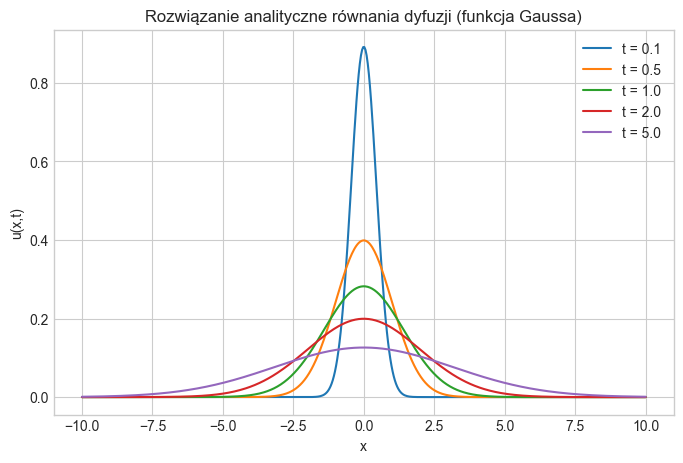

In [4]:
import numpy as np
import matplotlib.pyplot as plt

D = 1.0  
x = np.linspace(-10, 10, 500) 
t_values = [0.1, 0.5, 1.0, 2.0, 5.0] 

def gaussian_diffusion(x, t, D):
    return 1 / np.sqrt(4 * np.pi * D * t) * np.exp(-x**2 / (4 * D * t))

plt.figure(figsize=(8, 5))
for t in t_values:
    u = gaussian_diffusion(x, t, D)
    plt.plot(x, u, label=f't = {t}')

plt.title("Rozwiązanie analityczne równania dyfuzji (funkcja Gaussa)")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)
plt.show()
